In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [4]:
# df_results = S21.loop_over_S21_files(r'Test_S21/')
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT361w2chip9_BF_20241211\S21\Power/'
# dir = r'Test_s21/'
df = S21.loop_over_S21_files(dir, kid=None, pread=110)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIP

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr
0,100,-110.0,0.099972,4.547043,3.379507e-06,33850.248500,1599.596589,56218.176565,2230.541919,85077.135503,7580.661176,-71.879029,0.015762
1,101,-110.0,0.100058,4.553863,4.666957e-06,28730.905353,793.966857,48529.331524,18.053162,70424.367010,4796.281713,-72.664556,0.009010
2,102,-110.0,0.099965,4.553832,5.083137e-06,38081.225091,3616.440764,65803.388065,5433.868079,90392.428435,14221.239252,-71.539763,0.018533
3,103,-110.0,0.099961,4.562683,1.982711e-07,28450.761521,65.039815,51055.765754,98.185386,64259.019850,248.378694,-72.970069,0.000016
4,104,-110.0,0.099984,4.564945,5.106716e-07,26097.791265,140.242207,44932.083983,211.405668,62260.269947,599.662190,-73.164989,0.000109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,96,-110.0,0.099982,4.541921,1.418044e-07,29224.154777,49.412740,50945.848969,73.052343,68542.046600,203.511015,-72.727748,0.000009
901,97,-110.0,0.100007,4.544815,3.422037e-06,31307.896891,1404.641403,53885.594585,2091.371905,74721.730359,6078.576809,-72.373148,0.009524
902,98,-110.0,0.100063,4.545848,5.927459e-06,14244.079082,514.961297,34168.971030,1427.844909,24427.009530,1215.584725,-77.235130,0.006061
903,99,-110.0,0.100067,4.545894,7.018326e-06,21411.041390,1271.172815,41366.507972,2325.464832,44383.828897,4159.436808,-74.525232,0.011199


In [5]:
def fit(x, a, b):
    return a*x**(-2)+b 

588
385354.93144895363 30883.386968872168


C:\Users\wilbertr\AppData\Local\Temp\ipykernel_42324\2799203029.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, .5e6)


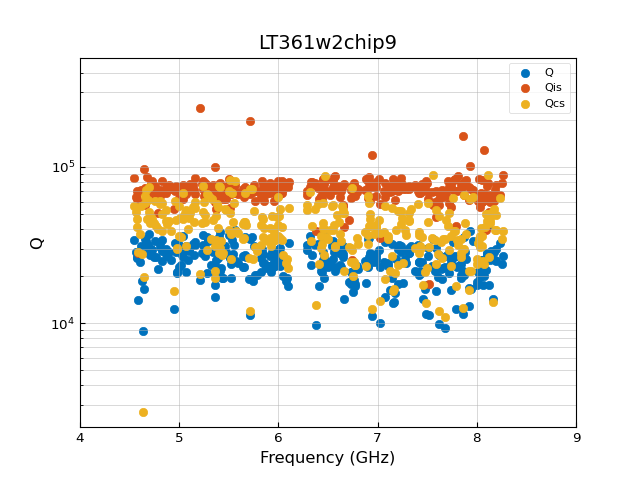

In [8]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots()
ax.set_title('LT361w2chip9')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, .5e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

Text(0, 0.5, 'Length coupler (um)')

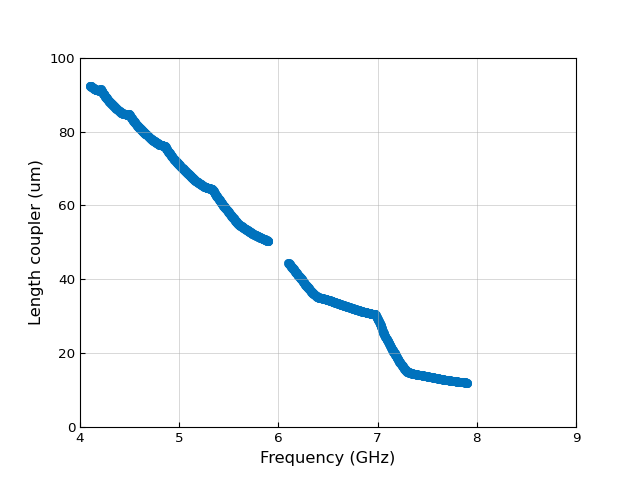

In [56]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')